# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate


In [2]:
data = pd.read_csv('data.csv')
rows_of_all_table = 649

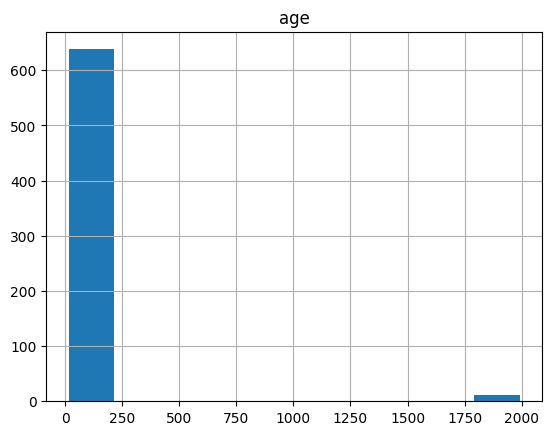

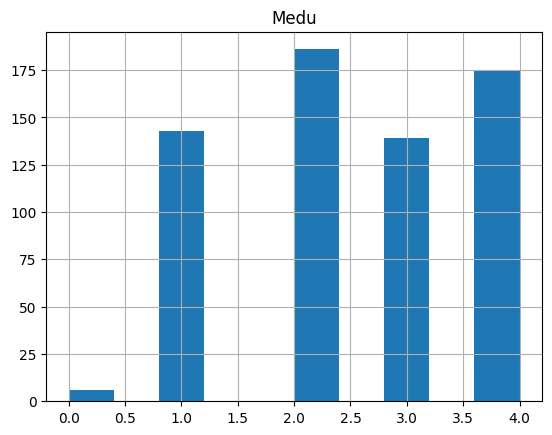

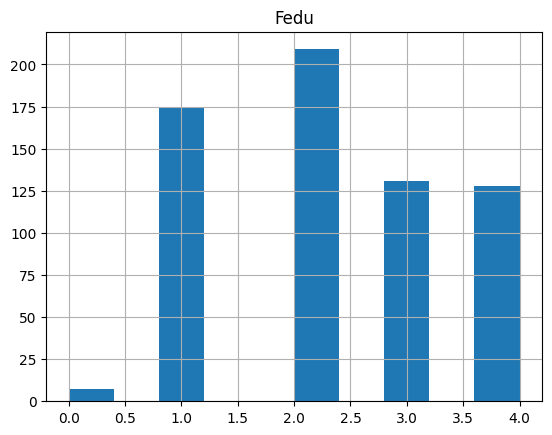

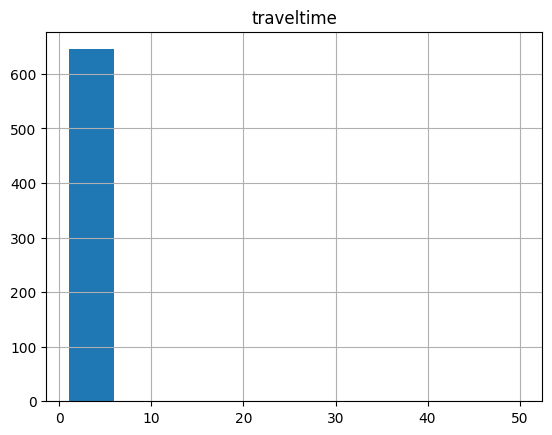

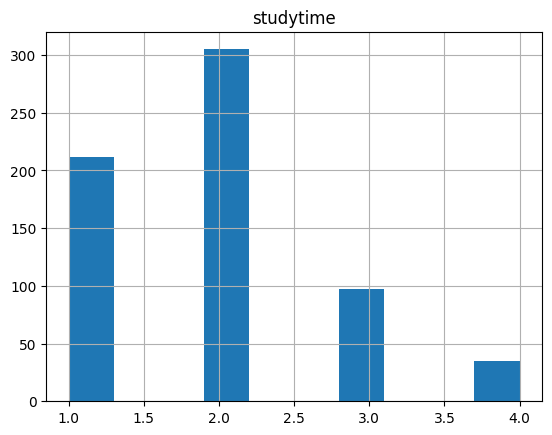

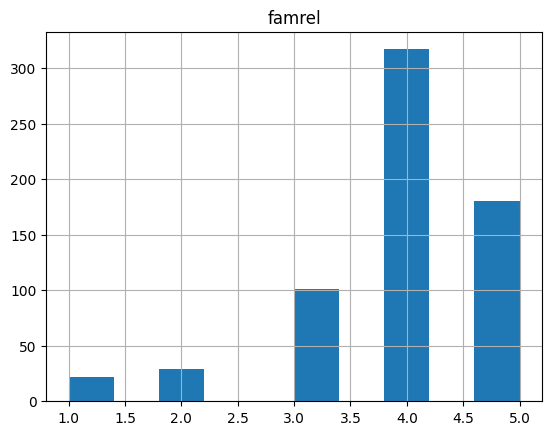

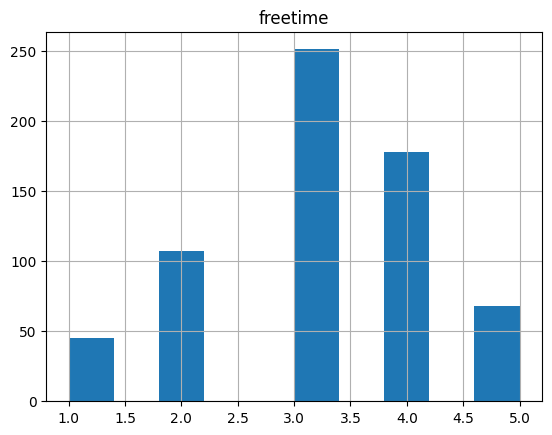

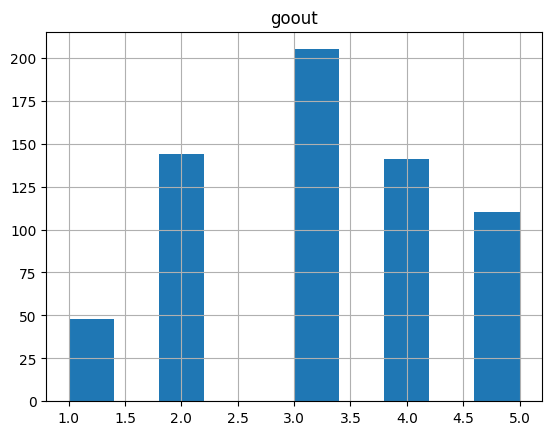

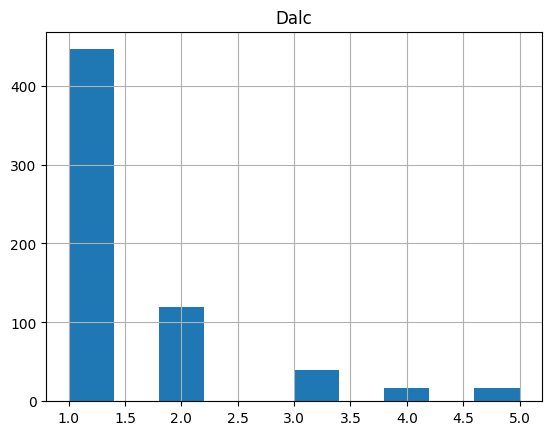

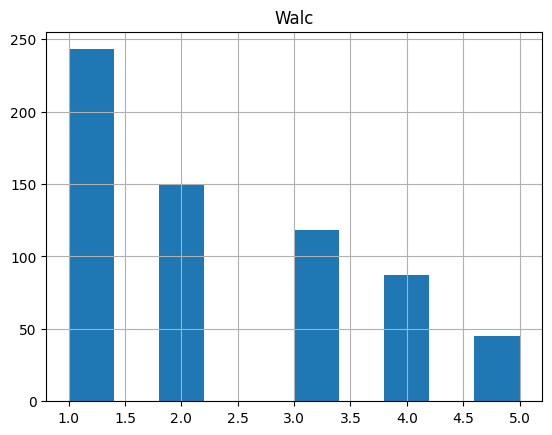

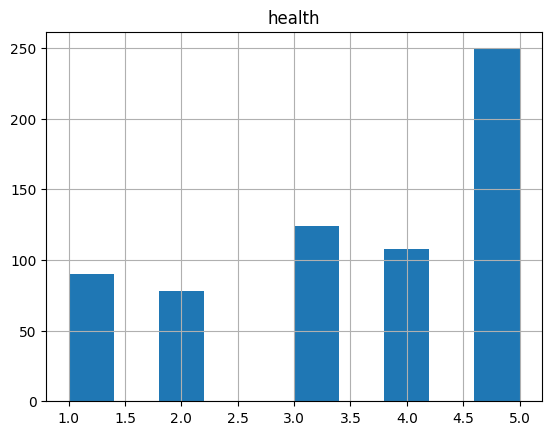

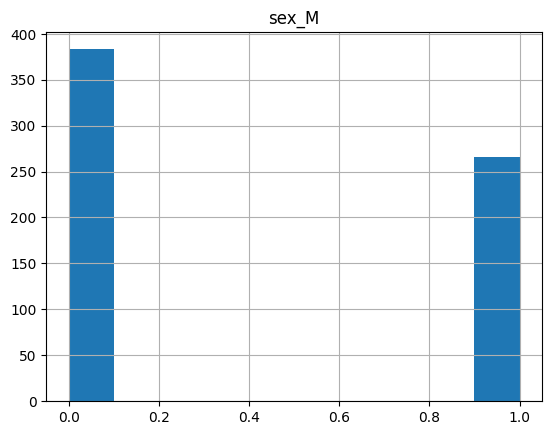

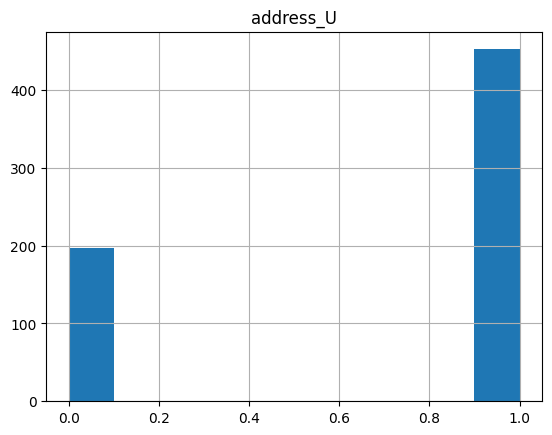

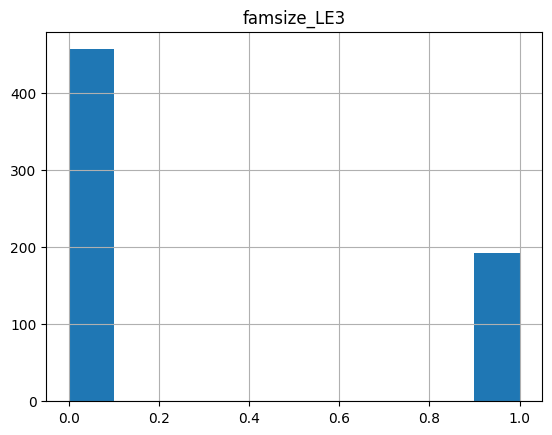

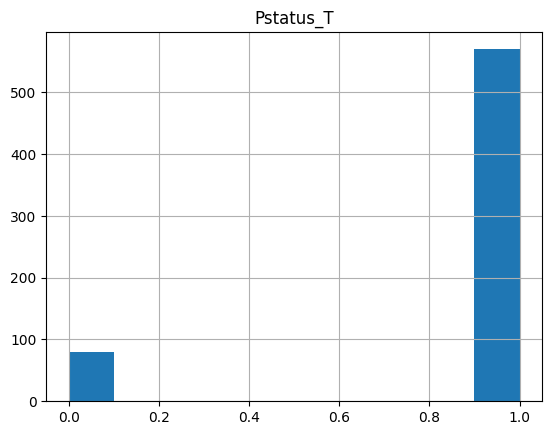

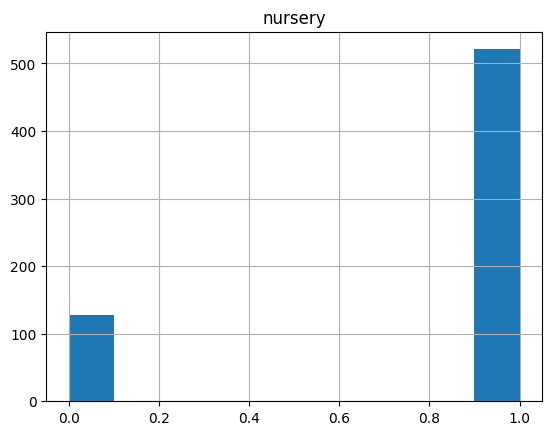

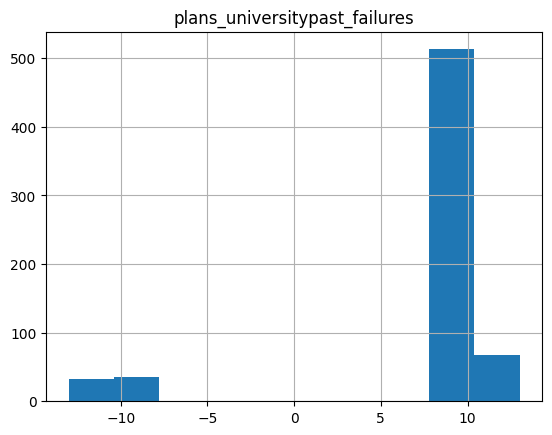

In [3]:
for col in data.columns:
    data.hist(column=f'{col}')

### Идея
Ну идея была в том, чтобы вывести гистограмму по встречаемости ответов в каждом стобце и посмотреть что-нибудь аномальное, по итогу что плохого мы увидели методом пристального взгляда:
*   В ответах с возрастом (age) иногда вместо возраста встречается год рождения
*   В гистограмме времени до школы (traveltime) мы видим какое-то странное масштабирование графика из чего скорее всего делаем вывод, что есть выбросы где вместо диапазона указано время в минутах
*   Два последних столбца (plans_university) и (past_failures) слиты в один, надо их разъединить
---
#### Легко понять, что не соответствует описанию тут именно age, поэтому в этом задании пофиксим его

array([[<Axes: title={'center': 'age'}>]], dtype=object)

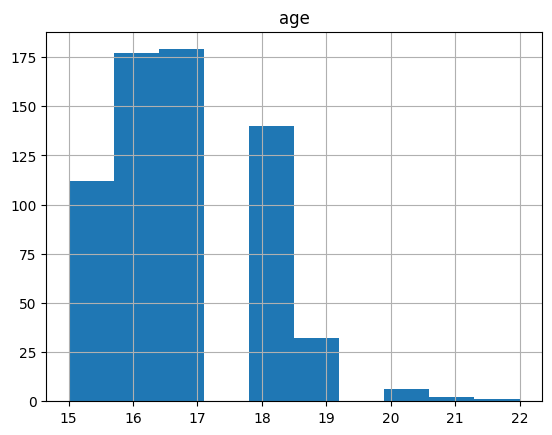

In [8]:
# Fix age column
for i in range (rows_of_all_table):
    if (data.loc[i, 'age'] > 80):
      data.loc[i, 'age'] = 2006 - data.loc[i, 'age']
data.hist(column='age')

### Ну собственно, теперь гистограмма выглядит нормально, считаем, что починили

### Задача 2: пропуски в данных
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

__(+1 балл)__

Дополнительно сравните качество замены на среднее по столбцу и на медиану по столбцу


*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

### Тут мы подумали что в первом возможно имелось ввиду ошибка двух столбиков, поэтому написали её решение тут

In [4]:
# divide two last columns
s = 'plans_universitypast_failures'
check = []
for i in range (rows_of_all_table):
  if(data.loc[i, s] < 0):
    check.append(True)
    data.loc[i, s] *= -1
    data.loc[i, s] = str(data.loc[i, s])
    data.loc[i, s] = data.loc[i, s][0] + ' ' + data.loc[i, s][1]
  else :
    check.append(False)
    data.loc[i, s] = str(data.loc[i, s])
    data.loc[i, s] = data.loc[i, s][0] + ' ' + data.loc[i, s][1]

new_df = data[s].str.split(' ',expand=True)

new_df.columns=['plans_university','past_failures']

data = pd.concat([data,new_df],axis=1)

data = data.drop(s,axis=1)

a = 'plans_university'
b = 'past_failures'

for i in range (rows_of_all_table):
  data.loc[i, b] = int(data.loc[i, b])
  data.loc[i, a] = int(data.loc[i, a])
  if check[i] == True:
    data.loc[i, a] *= -1


### А тут вернулись к заданию 2

In [5]:
# take avg to NaN
data_columns_before = data.columns

array_of_nuns = pd.DataFrame()

for i in data.columns:
  sum = 0
  c = 0
  bool_series = pd.isnull(data[i])
  array_of_nuns[i] = bool_series
  for j in range(rows_of_all_table):
    if bool_series[j] == False:
      sum += data.loc[j, i]
      c += 1
  avg = round(sum / c)
  for j in range(rows_of_all_table):
    if bool_series[j] == True:
      data.loc[j, i] = avg

#### Вот это активировали только перед отчетом для медианы

In [16]:
# take median to NaN

for i in data_columns_before:
  a = []
  for j in range(rows_of_all_table):
    if array_of_nuns.loc[j, i] == False:
      a.append(data.loc[j, i])
  a.sort()
  n = len(a)
  for j in range(rows_of_all_table):
    if array_of_nuns.loc[j, i] == True:
      data.loc[j, i] = a[n // 2]


### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [14]:
# Your code here
for i in data.columns:
  mn = 1e9
  mx = -1e9
  for j in range(rows_of_all_table):
    mx = max(mx, data.loc[j, i]);
    mn = min(mn, data.loc[j, i]);
  for j in range(rows_of_all_table):
    data.loc[j, i] = (data.loc[j, i] - mn) / (mx - mn)

print(data)

          age  Medu  Fedu  traveltime  studytime  famrel  freetime  goout  \
0    0.142857  1.00  1.00    0.000000   0.333333    1.00      0.75   0.75   
1    0.285714  1.00  1.00    0.000000   0.000000    1.00      0.50   0.75   
2    0.142857  0.25  0.25    0.333333   0.000000    0.75      1.00   1.00   
3    0.428571  0.25  0.50    0.333333   0.000000    0.50      0.75   0.75   
4    0.285714  0.50  0.25    0.333333   0.333333    0.75      0.25   1.00   
..        ...   ...   ...         ...        ...     ...       ...    ...   
644  0.428571  0.50  0.50    1.000000   0.333333    0.75      0.25   1.00   
645  0.000000  1.00  1.00    0.333333   0.333333    0.75      0.50   0.00   
646  0.857143  0.25  0.25    0.333333   0.333333    1.00      0.50   0.50   
647  0.142857  0.50  0.50    0.000000   0.000000    0.75      0.50   0.75   
648  0.142857  0.50  0.75    0.666667   0.333333    0.75      1.00   0.75   

     Dalc  Walc  health  sex_M  address_U  famsize_LE3  Pstatus_T  nursery 

### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [6]:
scores = pd.read_csv('scores.csv')
print(scores)

     scores
0      70.0
1      85.0
2      45.0
3      55.0
4      55.0
..      ...
644    50.0
645    75.0
646    50.0
647    40.0
648    75.0

[649 rows x 1 columns]


 #### Если что, то кривой файл scores.scv мы пофиксили руками, написав в первой строке там название столбца scores
 ##### А ещё чтобы разница была виднее, тут запущена только 1 и 2 задача

In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
model = LinearRegression()
res = cross_validate(model, data.values, scores.values, cv = 4)
print('test_score:',res['test_score'])
x_train, x_test, y_train, y_test = train_test_split(data.values, scores.values, test_size=0.4, random_state=0)
regression = linear_model.LinearRegression().fit(x_train, y_train)
prediction = regression.predict(x_test)
print('squared_error:',mean_squared_error(y_test, prediction))


test_score: [0.21881645 0.25841768 0.14161857 0.23287806]
squared_error: 228.38486385840906


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Попробуйте несколько способов добавления полных данных

In [9]:
attendance_data = pd.read_csv('attendance.csv', delimiter=';')
attendance_data_sum = []
for j in range(rows_of_all_table):
  cnt = 0
  for i in attendance_data.columns:
    if attendance_data.loc[j, i] == '+':
      cnt += 1
  attendance_data_sum.append(cnt)

data['attendance'] = attendance_data_sum


In [10]:
a = [(0)] * rows_of_all_table
school_sup_data = pd.read_table('school_support.txt')
for i in range(len(school_sup_data)):
    a[school_sup_data.loc[i, 'support']] = 1
data['school_support_binary'] = a


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

array([[<Axes: title={'center': 'traveltime'}>]], dtype=object)

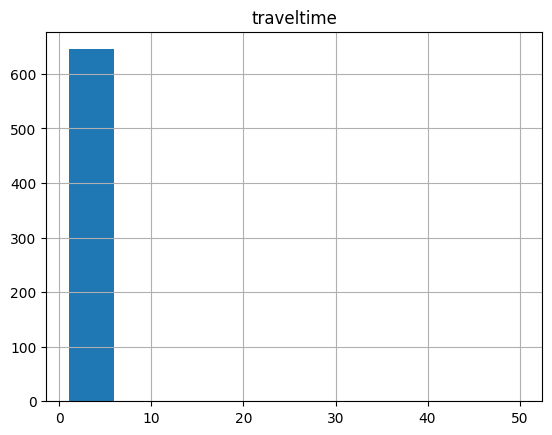

In [11]:
data.hist(column='traveltime')

#### Как мы помним мы придумали использовать гистограммы раньше чем нам их посоветовали, поэтому мы понимаем о чем идет речь, поэтому давайте фиксанем её

array([[<Axes: title={'center': 'traveltime'}>]], dtype=object)

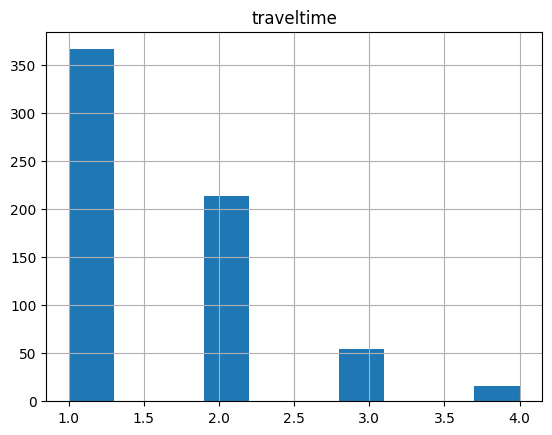

In [12]:
for i in range (rows_of_all_table):
    if (data.loc[i, 'traveltime'] > 4):
      if(data.loc[i, 'traveltime'] < 15):
        data.loc[i, 'traveltime'] = 1
      elif(data.loc[i, 'traveltime'] < 30):
        data.loc[i, 'traveltime'] = 2
      elif(data.loc[i, 'traveltime'] < 60):
        data.loc[i, 'traveltime'] = 3
      else:
        data.loc[i, 'traveltime'] = 4
data.hist(column='traveltime')

__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказаниепосчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

In [13]:
import sklearn
from sklearn import linear_model
X1 = data.values
y1 = scores.values
regression = linear_model.LinearRegression().fit(X1, y1)
error = []
for i in X1:
  j = [i]
  prediction = regression.predict(j)
  error.append((prediction[0] - y1)**2)
array_of_errors = []
for i in error[0]:
  array_of_errors.append(i[0])

array_of_errors.sort()
array_of_errors.reverse()
print(array_of_errors)



[4102.0523520078905, 4102.0523520078905, 4102.0523520078905, 4102.0523520078905, 4102.0523520078905, 4102.0523520078905, 4102.0523520078905, 4102.0523520078905, 4102.0523520078905, 4102.0523520078905, 4102.0523520078905, 4102.0523520078905, 4102.0523520078905, 4102.0523520078905, 4102.0523520078905, 4057.341765425726, 4038.2550854619412, 4031.902858807347, 4031.902858807347, 4012.8761788435613, 3486.5796865483967, 1524.6890247104202, 1159.216359250926, 1159.216359250926, 1159.216359250926, 958.0717082775025, 958.0717082775025, 843.743693791432, 843.743693791432, 843.743693791432, 843.743693791432, 843.743693791432, 843.743693791432, 843.743693791432, 843.743693791432, 843.743693791432, 673.5443737369966, 673.5443737369966, 673.5443737369966, 673.5443737369966, 673.5443737369966, 673.5443737369966, 673.5443737369966, 673.5443737369966, 673.5443737369966, 673.5443737369966, 673.5443737369966, 673.5443737369966, 673.5443737369966, 673.5443737369966, 673.5443737369966, 578.2710283319378, 5

### Ну так как мы исправили все ошибки уже до этого, то тут ничего не будем менять, ошибки являются нормальными хоть и иногда дают разность аж в 60 баллов

### Финальное предсказание и отчёт

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных.

### Вот это запуск с средним значением из второй задачи

In [15]:
model = LinearRegression()
res = cross_validate(model, data.values, scores.values, cv = 4)
print('test_score:',res['test_score'])
x_train, x_test, y_train, y_test = train_test_split(data.values, scores.values, test_size=0.4, random_state=0)
regression = linear_model.LinearRegression().fit(x_train, y_train)
prediction = regression.predict(x_test)
print('squared_error:',mean_squared_error(y_test, prediction))


test_score: [0.27060316 0.2757387  0.12815065 0.22059342]
squared_error: 225.3934683786183


### А вот это запуск с медианным значением из второй задачи

In [17]:
model = LinearRegression()
res = cross_validate(model, data.values, scores.values, cv = 4)
print('test_score:',res['test_score'])
x_train, x_test, y_train, y_test = train_test_split(data.values, scores.values, test_size=0.4, random_state=0)
regression = linear_model.LinearRegression().fit(x_train, y_train)
prediction = regression.predict(x_test)
print('squared_error:',mean_squared_error(y_test, prediction))


test_score: [0.27060316 0.2757387  0.12815065 0.22059342]
squared_error: 225.3934683786183


### Заключение
Ну квадрат ошибки уменьшился не сильно, скорее всего из-за малой выборки, что касаемо медианного значения - оно почему-то получилось такое же как и Avg если смотреть по квадрату ошибки, что маловероятно на самом деле, но ошибку я найти не смог, а лучше уж сдать перед дедлайном с одной непоняткой, чем после дедлайна.
Работу выполнял с Ярославом Прыгуновым